## Import Libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.set_printoptions(linewidth=100, precision=3, suppress=True)

## Load data

In [2]:
data = pd.read_csv("1.04. Real-life example.csv")
dataset = data.copy()
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Data Pre-processing

In [3]:
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
# We don't really need the Model for this regressionso we will drop the column
dataset = dataset.drop(['Model'], axis=1)

In [5]:
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [6]:
# Checking for null values in the dataset
dataset.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [22]:
# We have null values for Price and Enginev
# Since the missing value are is less than 5%, we can drop them

# Nous avons des valeurs nulles pour Price et Enginev
# Puisque la valeur manquante est inférieure à 5%, nous pouvons les supprimer.

In [8]:
# Droping null values using ***dropna
# Suppression des valeurs nulles avec ***dropna

dataset = dataset.dropna(axis=0)
dataset.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [9]:
# discribing the dataset again
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


A great step in the data exploration is to display the probability distribution function (PDF) of a variable

The PDF will show us how that variable is distributed 

This makes it very easy to spot anomalies, such as outliers

The PDF is often the basis on which we decide whether we want to transform a feature

     Une étape importante dans l'exploration des données consiste à afficher la fonction de 
     distribution de probabilité (PDF) d'une variable.
     
     La PDF nous montre comment cette variable est distribuée. 
     
     Cela permet de repérer très facilement les anomalies, comme les valeurs aberrantes.
     
     La PDF est souvent la base sur laquelle nous décidons si nous voulons transformer une caractéristique.

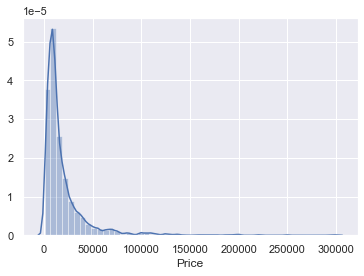

In [10]:
# Distribution plot of Price
# Distribution des prix

sns.distplot(dataset['Price'])

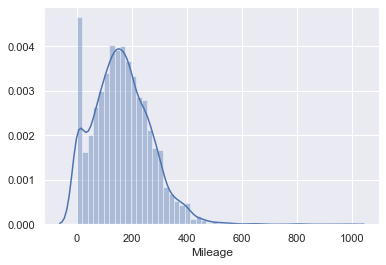

In [16]:
# Distribution plot of Mileage
# Distribution du kilométrage

sns.distplot(dataset['Mileage'])

In [13]:
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


From our observation, we see there is a big variation in price and thus many outliers. 
To resolve this, we can remove the top 1% of observations by using the quantile 
    
    D'après notre observation, nous voyons qu'il y a une grande variation dans les prix et donc beaucoup de valeurs aberrantes. Pour résoudre ce problème, nous pouvons éliminer les 1% d'observations les plus élevées en utilisant le quantile. 

In [14]:
# Creating a new dataset containing the rest 99% of observations

# Créer un nouvel ensemble de données contenant le reste des 99% d'observations

qu99 = dataset["Price"].quantile(0.99)

In [15]:
qu99

129812.51999999981

In [19]:
new_dataset = dataset[dataset["Price"] < qu99]

In [20]:
new_dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


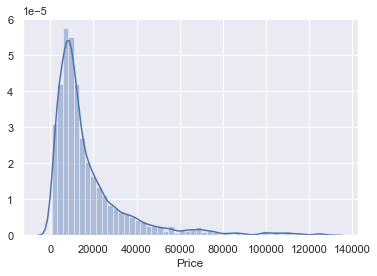

In [21]:
sns.distplot(new_dataset["Price"])

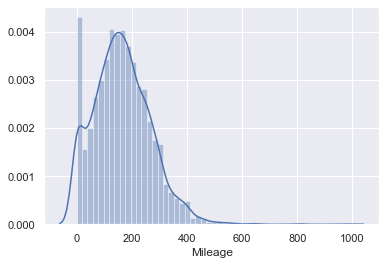

In [23]:
sns.distplot(new_dataset["Mileage"])

In [28]:
q1 = new_dataset["Mileage"].quantile(0.99)
q1

435.5100000000002

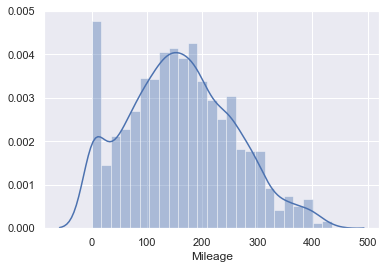

In [30]:
new_dataset_1 = new_dataset[new_dataset["Mileage"] < q1]
sns.distplot(new_dataset_1["Mileage"])

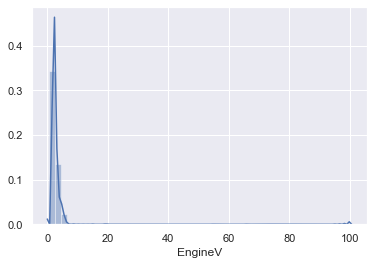

In [31]:
sns.distplot(new_dataset_1["EngineV"])

In [32]:
# From industry knowledge, car engine volumes are usually below 6.5l
# so we will sliceout only engine volumes < 6.5

# D'après les connaissances de l'industrie, les volumes des moteurs de voitures sont généralement inférieurs à 6,5 litres.
# donc nous allons découper uniquement les volumes de moteur < 6.5l

new_dataset_2 = new_dataset_1[new_dataset_1["EngineV"] < 6.5 ]

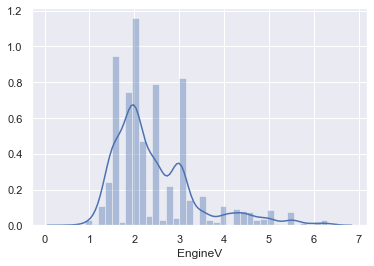

In [33]:
# We have a more accurate data
# Nous avons des données plus précises

sns.distplot(new_dataset_2["EngineV"])

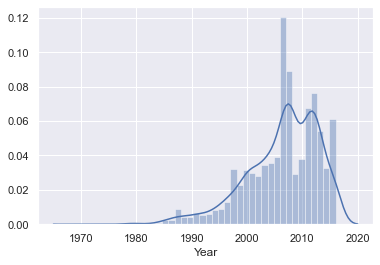

In [34]:
# From the distribution, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end

sns.distplot(new_dataset_2["Year"])

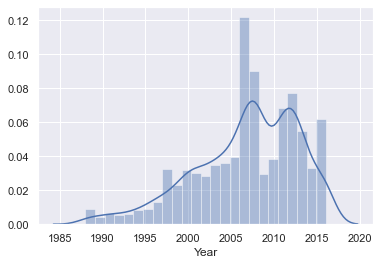

In [35]:
q3 = new_dataset_2["Year"].quantile(0.01)
new_dataset_3  = new_dataset_2[new_dataset_2["Year"] > q3]
sns.distplot(new_dataset_3["Year"])

In [36]:
# I now have a more representative dataset with few outliers for year of manufacture
# J'ai maintenant un ensemble de données plus représentatif avec peu de valeurs aberrantes pour l'année de fabrication.

In [37]:
new_dataset_3

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [38]:
# I now have a cleaned dataset to work with, so I can now reset the indexes
# J'ai maintenant un jeu de données nettoyé pour travailler avec, donc je peux maintenant réinitialiser les index.

dataset_cleaned = new_dataset_3.reset_index(drop=True) # drop=True to delete the old indexes
dataset_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


# Checking the OLS assumptions
# Vérification des hypothèses des MCO

Text(0.5, 1.0, 'Price and Mileage')

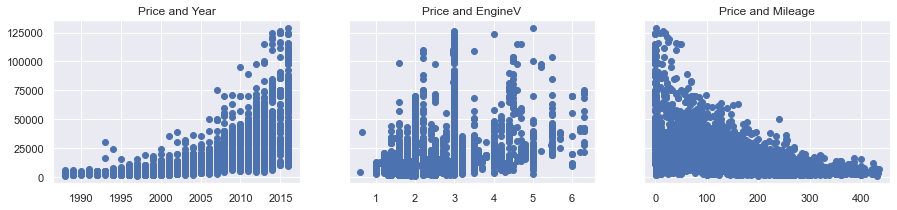

In [40]:
# Seperately ploting, Year, EngineV, and Mileage against Price on a single plot
# Diagramme de dispersion de l'année, du moteur V et du kilométrage en fonction
# du prix sur un seul graphique.

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y-axis
ax1.scatter(dataset_cleaned['Year'],dataset_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(dataset_cleaned['EngineV'],dataset_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(dataset_cleaned['Mileage'],dataset_cleaned['Price'])
ax3.set_title('Price and Mileage')


In [41]:
# It can be seen that the distribution of price is not linear but exponential
# and thus can not be used to for regression as it is.
# I will have to convert it to a linear distribution by using a log transformation

# On peut voir que la distribution du prix n'est pas linéaire mais exponentielle
# et ne peut donc pas être utilisée telle quelle pour la régression.
# Je vais devoir la convertir en une distribution linéaire en utilisant une transformation logarithmique.

In [43]:
log_price = np.log(dataset_cleaned['Price'])
dataset_cleaned["LogPrice"] = log_price
dataset_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,LogPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Re-ploting the scatter plots again using **LogPrice**.

Replacer les diagrammes de dispersion en utilisant **LogPrice**.

Text(0.5, 1.0, 'Price and Mileage')

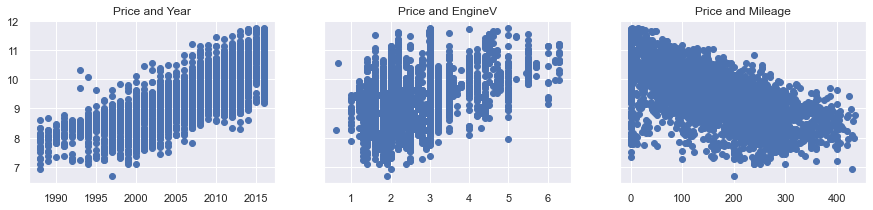

In [44]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y-axis
ax1.scatter(dataset_cleaned['Year'],dataset_cleaned['LogPrice'])
ax1.set_title('Price and Year')
ax2.scatter(dataset_cleaned['EngineV'],dataset_cleaned['LogPrice'])
ax2.set_title('Price and EngineV')
ax3.scatter(dataset_cleaned['Mileage'],dataset_cleaned['LogPrice'])
ax3.set_title('Price and Mileage')

I now have a clear linear relationship between the variables.

Alternatively, I could have transform each independent variable individually




J'ai maintenant une relation linéaire claire entre les variables.

Alternativement, j'aurais pu transformer chaque variable indépendante individuellement 

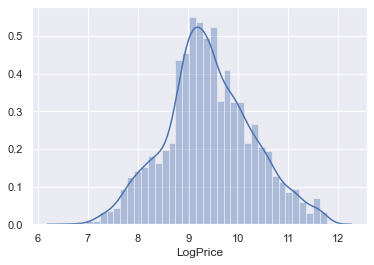

In [45]:
# I have a more normally distributed LogPrice data
# J'ai des données LogPrice plus normalement distribuées.

sns.distplot(dataset_cleaned['LogPrice'])

In [49]:
# Dropping the Price column fro the dataset
# Suppression de la colonne Prix de l'ensemble de données.


# dataset_cleaned.drop(["Price"], axis=1) # Test
dataset_cleaned = dataset_cleaned.drop(["Price"], axis=1)

## Multicollinearity

In [55]:
# Columns of the dataset

dataset_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration', 'Year', 'LogPrice'],
      dtype=object)

In [60]:
# To check for Multicollinearity among the independent variables, 
# I am going to use the VIF(variance_inflation_factor) method from statsmodel

# Pour vérifier la multicolinéarité entre les variables indépendantes, 
# je vais utiliser la méthode VIF (facteur d'inflation de la variance) de statsmodel.

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a variable containing the columns I want to check for multiplecolinearity
variables = dataset_cleaned[['Mileage','Year','EngineV']]

# Create a dataframe to hold the resultd
vif = pd.DataFrame()

# I finally make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [71]:
# Exploring the result
# Generally, variables with VIFs of below 6 or 7 are allowed
# Généralement, les variables dont le VIF est inférieur à 6 ou 7 sont acceptées.

vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [67]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case

dataset_no_multicollinearity = dataset_cleaned.drop(['Year'],axis=1)
dataset_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,LogPrice
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Create dummy variables for categorical Data

Using get_dummies to deal with categorical(non numerical data)

Utilisation de get_dummies pour traiter des données catégorielles (non numériques)


In [70]:
# It is extremely important to drop one of the dummies, alternatively, multicollinearity will be introduce
# Il est extrêmement important de supprimer l'une des variables muettes, sinon, 
# la multicollinéarité sera introduite.

dataset_with_dummies = pd.get_dummies(dataset_no_multicollinearity, drop_first=True)

### Reaarranging columns in the dataset

In [72]:
# Get all the column names and rearrange them manually
# Obtenez tous les noms de colonnes et réorganisez-les manuellement.

dataset_with_dummies.columns.values

array(['Mileage', 'EngineV', 'LogPrice', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [73]:
# Copy and paste the column names from above then re-arrange them for Y variable to be first
# Copiez et collez les noms des colonnes ci-dessus, puis réorganisez-les pour que la variable Y soit la première.

cols = ['LogPrice', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']

In [75]:
# dataset_with_dummies[cols] # Test

dataset_preprocessed = dataset_with_dummies[cols]
dataset_preprocessed

,LogPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Declaring the Predicted variable and Predictor variables

## Déclaration de la variable prédite et des variables prédicteurs

**_y_**: predicted_var 

**_xi_**: predictors_var    

In [77]:
predicted_var = dataset_preprocessed["LogPrice"]
predicted_var

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: LogPrice, Length: 3867, dtype: float64

In [78]:
predictors_var = dataset_preprocessed.drop(["LogPrice"], axis=1)
predictors_var

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Scaling the independent variables of the dataset

In [79]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [80]:
# Create a scaler object
# Créez un objet scaler


scaler = StandardScaler()

In [81]:
# Fitting the data to be scaled
# Ajuster les données à mettre à l'échelle

scaler.fit(predictors_var)

StandardScaler()

In [82]:
# Scale the features(predictors_var) and store them in a new variable (the actual scaling procedure)
# Mettre à l'échelle les caractéristiques (predictors_var) et 
# les stocker dans une nouvelle variable (la procédure réelle de mise à l'échelle).

predictors_var_scaled = scaler.transform(predictors_var)
predictors_var_scaled

array([[ 1.218, -0.475,  2.28 , ..., -0.162,  1.333,  0.321],
       [ 2.787,  0.474, -0.439, ..., -0.162, -0.75 ,  0.321],
       [ 2.065,  2.686, -0.439, ..., -0.162, -0.75 ,  0.321],
       ...,
       [-1.585,  0.579, -0.439, ..., -0.162, -0.75 ,  0.321],
       [-1.668,  1.106,  2.28 , ..., -0.162,  1.333,  0.321],
       [-0.382, -0.475, -0.439, ..., -0.162, -0.75 ,  0.321]])

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Split the variables with an 80% - 20% split and some random_state of 43
# Diviser les variables avec une répartition 80% - 20% et un état aléatoire de 43

x_train, x_test, y_train, y_test = train_test_split(predictors_var_scaled, predicted_var, test_size=0.2, random_state=43)

The **__train_** variables are used to train the model while the **__test_** variables will be use to test the model

Les variables **__train_** sont utilisées pour entraîner le modèle tandis que les variables **__test_** seront utilisées pour tester le modèle.

# Creating the Linear Regression Model

In [85]:
# Create a linear regression object
# Créer un objet de régression linéaire

reg = LinearRegression()

In [86]:
# Fit the regression with the scaled TRAINED predictors and predicted variables
# Ajuster la régression avec les prédicteurs formés et les variables prédites.

reg.fit(x_train, y_train)

LinearRegression()

In [90]:
# Checking outputs of the regression
# Vérifier les résultats de la régression

y_hat = reg.predict(x_train)
# y_hat

In [91]:
# The simplest way to compare the predicted variables (y_train) and the predictor variables (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction

# La façon la plus simple de comparer les variables prédites (y_train) et les variables prédicteurs (y_hat) est de les représenter sur un nuage de points.
# Plus les points sont proches de la ligne à 45 degrés, meilleure est la prédiction.

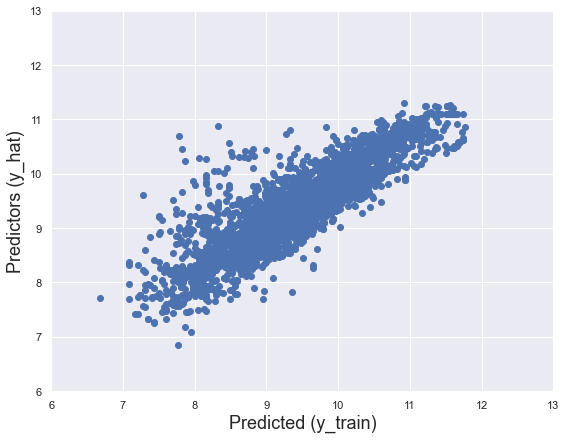

In [100]:
# Graph size
# Taille du graphique
plt.figure(figsize=(9, 7))

# Plot Data
plt.scatter(y_train, y_hat)

# Axis Label
plt.xlabel('Predicted (y_train)',size=18)
plt.ylabel('Predictors (y_hat)',size=18)

# Maintaining same interval for both x and y Axis
# Maintenir le même intervalle pour les axes x et y.
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Residual Plot

Text(0.5, 1.0, 'Residual Plot')

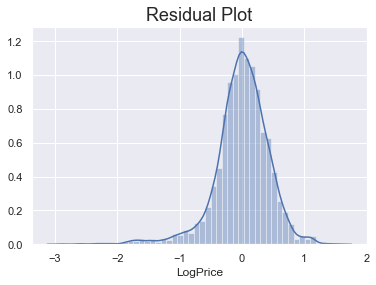

In [104]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", fontsize=18)

In [105]:
# In the best case scenario this plot should be normally distributed
# In this case it can be observe that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictor variables) are much higher than y_train (the predicted variables)
# This is food for thought to improve the model


# Dans le meilleur des cas, ce graphique devrait être normalement distribué.
# Dans ce cas, on peut observer qu'il y a beaucoup de résidus négatifs (très éloignés de la moyenne).
# Compte tenu de la définition des résidus (y_train - y_hat), des valeurs négatives impliquent
# que y_hat (variables prédicteurs) sont beaucoup plus élevés que y_train (variables prédites).
# Il y a là matière à réflexion pour améliorer le modèle.

In [124]:
# Find the R-squared of the model

reg.score(x_train,y_train)

0.7529744855146684

## Finding Weights and Bais - Poids et les Bais

In [125]:
# Obtain the bias (intercept) of the regression

reg.intercept_

9.414729290240768

In [126]:
# Obtain the weights (coefficients) of the regression
# Obtenir les poids (coefficients) de la régression

reg.coef_

array([-0.459,  0.216,  0.011,  0.002, -0.139, -0.185, -0.061, -0.096, -0.147, -0.097, -0.192,
       -0.111, -0.164, -0.121, -0.03 , -0.154,  0.327])

In [128]:
# Create a regression summary to compare bais of the weights
# Créer un résumé de régression pour comparer les poids.

summ_tab = pd.DataFrame(data=predictors_var.columns.values, columns=["Features"])
summ_tab["Weights"] = reg.coef_
summ_tab

,Features,Weights
0,Mileage,-0.459394
1,EngineV,0.216260
2,Brand_BMW,0.011299
3,Brand_Mercedes-Benz,0.001598
4,Brand_Mitsubishi,-0.138964
5,Brand_Renault,-0.184588
6,Brand_Toyota,-0.061419
7,Brand_Volkswagen,-0.096160
8,Body_hatch,-0.147118
9,Body_other,-0.096952


In [131]:
# The positive continous varialble indicates that, as the value increases, so thus the price
# The negative continous varialble indicates that, as the value increases, the price reduces

# The positive continous varialble indicates that, as the value increases, so thus the price
# The negative continous varialble indicates that, as the value increases, the price reduces

In [130]:
# Check the different categories in the 'Brand' variable
dataset_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'Mitsubishi'],
      dtype=object)

# Model Accuracy - Précision du modèle

In [108]:
y_pred = reg.predict(x_test)
print("R-Squared:", reg.score(x_test,y_test))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

R-Squared: 0.7417206451215743
Residual sum of squares (RSS): 151.40
Mean absolute error (MAE): 0.32
Mean square error (MSE): 0.20
Root mean square error (RMSE): 0.44


# Testing

In [132]:
# Once a model has been trained and fine-tuned, it can now be tested
# Testing is done on a dataset that the algorithm has never seen
# I am goingto use the test portion of my dataset
# The test predictor variables is 'x_test', while the pridicted variables is 'y_test' 
# I did NOT TRAIN THE MODEL ON THEM, I will just feed them and find the predictions
# If the predictions are far off, then I will know that the model overfitted

# Une fois qu'un modèle a été entraîné et affiné, il peut maintenant être testé.
# Les tests sont effectués sur un ensemble de données que l'algorithme n'a jamais vu.
# Je vais utiliser la partie test de mon ensemble de données.
# Les variables prédictives du test sont 'x_test', tandis que les variables prédites sont 'y_test'. 
# Je n'ai pas entraîné le modèle sur ces variables, je vais juste les alimenter et trouver les prédictions.
# Si les prédictions sont très éloignées, alors je saurai que le modèle a été surajusté.

In [133]:
y_hat_test = reg.predict(x_test)

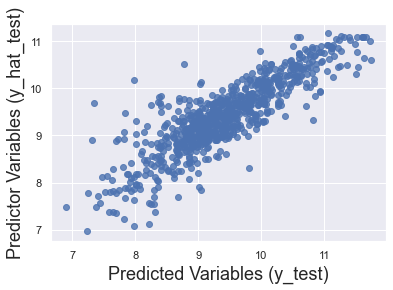

In [143]:
# Scatter plot with the test targets and the test predictions
# The argument 'alpha' introduce opacity to the graph

# Scatter plot avec les cibles du test et les prédictions du test
# L'argument 'alpha' introduit une opacité dans le graphique.


plt.scatter(y_test, y_hat_test, alpha=0.8)
plt.xlabel('Predicted Variables (y_test)',size=18)
plt.ylabel('Predictor Variables (y_hat_test)',size=18)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

In [145]:
# Manually checking the predictions
# To obtain the actual prices, I take the exponential of the LogPrices to get the original pice

# Vérifier manuellement les prédictions
# Pour obtenir les prix réels, je prends l'exponentielle des LogPrices pour obtenir le prix d'origine.

df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictors'])
df_pf.head()

,Predictors
0,14539.821587
1,16042.573631
2,24766.362618
3,25581.760274
4,25282.707171


In [146]:
# Include the test targets in the data frame (to manually compare them)
df_pf['Predicted'] = np.exp(y_test)
df_pf

,Predictors,Predicted
0,14539.821587,4200.0
1,16042.573631,NaN
2,24766.362618,NaN
3,25581.760274,NaN
4,25282.707171,NaN
...,...,...
769,25392.901755,NaN
770,6763.551218,22900.0
771,15875.257095,NaN
772,4627.451951,NaN


In [147]:
# A lot of missing values can be observed
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / maybe with the indexing


# On peut observer beaucoup de valeurs manquantes
# Il n'y a pourtant aucune raison d'avoir TOUTES les valeurs manquantes.
# Cela suggère que quelque chose ne va pas avec le cadre de données / peut-être avec l'indexation.

3866     9.510445
5        9.560997
2844    10.257659
2654    10.518673
196     10.122623
          ...    
94      10.571317
2843     8.771835
2489    10.257659
716      8.433812
463     10.257659
Name: LogPrice, Length: 774, dtype: float64

In [149]:
# It can be seen that indexing is the problem and I will have to reset the index
# On peut voir que l'indexation est le problème et je vais devoir réinitialiser l'index.

y_test = y_test.reset_index(drop=True) # Drop the actual index and Reset a new one
y_test

0       9.510445
1       9.560997
2      10.257659
3      10.518673
4      10.122623
         ...    
769    10.571317
770     8.771835
771    10.257659
772     8.433812
773    10.257659
Name: LogPrice, Length: 774, dtype: float64

In [150]:
df_pf['Predicted'] = np.exp(y_test)
df_pf

,Predictors,Predicted
0,14539.821587,13500.0
1,16042.573631,14200.0
2,24766.362618,28500.0
3,25581.760274,37000.0
4,25282.707171,24900.0
...,...,...
769,25392.901755,39000.0
770,6763.551218,6450.0
771,15875.257095,28500.0
772,4627.451951,4600.0


In [152]:
# Calculate the difference between the targets and the predictions
# This is actually the residual (The residuals have already been plotted)

# Calculez la différence entre les cibles et les prédictions.
# C'est en fait le résidu (les résidus ont déjà été tracés).

df_pf['Residual'] = df_pf['Predicted'] - df_pf['Predictors']
df_pf


# Since OLS is basically an algorithm which minimizes the total sum of squared errors (SSE - residuals),
# this comparison makes a lot of sense


# OLS est essentiellement un algorithme qui minimise la somme totale des erreurs quadratiques (résidus),
# cette comparaison a beaucoup de sens

,Predictors,Predicted,Residual
0,14539.821587,13500.0,-1039.821587
1,16042.573631,14200.0,-1842.573631
2,24766.362618,28500.0,3733.637382
3,25581.760274,37000.0,11418.239726
4,25282.707171,24900.0,-382.707171
...,...,...,...
769,25392.901755,39000.0,13607.098245
770,6763.551218,6450.0,-313.551218
771,15875.257095,28500.0,12624.742905
772,4627.451951,4600.0,-27.451951


In [155]:
# Finally, it makes sense to see how the predictions are far off from actual values percentage-wise
# Taking the absolute difference in %, to easily order the data frame

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Predicted']*100)
df_pf

# Enfin, il est utile de voir comment les prédictions sont éloignées des valeurs réelles en pourcentage.
# Prendre la différence absolue en %, pour ordonner facilement le cadre de données.

,Predictors,Predicted,Residual,Difference%
0,14539.821587,13500.0,-1039.821587,7.702382
1,16042.573631,14200.0,-1842.573631,12.975871
2,24766.362618,28500.0,3733.637382,13.100482
3,25581.760274,37000.0,11418.239726,30.860107
4,25282.707171,24900.0,-382.707171,1.536977
...,...,...,...,...
769,25392.901755,39000.0,13607.098245,34.889995
770,6763.551218,6450.0,-313.551218,4.861259
771,15875.257095,28500.0,12624.742905,44.297344
772,4627.451951,4600.0,-27.451951,0.596782


In [156]:
# Exploring the descriptives stats for additional insights
# Explorer les statistiques descriptives pour obtenir des informations supplémentaires.

df_pf.describe()

,Predictors,Predicted,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16338.034811,18248.998114,1910.963303,37.183317
std,13147.835932,19126.040027,10348.002741,63.873187
min,1062.516424,999.000000,-30282.722605,0.000425
25%,7883.881149,7200.000000,-2179.720469,11.256024
50%,12269.820916,11750.000000,272.062668,23.126521
75%,19927.045941,21675.000000,3240.542888,41.501936
max,70632.084716,125000.000000,84397.287198,951.255075


In [157]:
# Sometimes it is useful to check these outputs manually
# To see all rows, I can use the relevant pandas syntax

# Il est parfois utile de vérifier ces sorties manuellement.
# Pour voir toutes les lignes, je peux utiliser la syntaxe pandas correspondante.

pd.options.display.max_rows = 999

# Use 2 digits after the dot to make the dataset clear 
# Utilisez 2 chiffres après le point pour que l'ensemble de données soit clair. 

pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Finally, sort by difference in % and manually check the model
# Enfin, trier par différence en % et vérifier manuellement le modèle

df_pf.sort_values(by=['Difference%'])

,Predictors,Predicted,Residual,Difference%
155,3499.99,3500.00,0.01,0.00
709,8951.37,8950.00,-1.37,0.02
90,17005.15,16999.00,-6.15,0.04
569,52146.07,52055.25,-90.82,0.17
283,8683.04,8700.00,16.96,0.19
481,8877.00,8900.00,23.00,0.26
718,8470.60,8500.00,29.40,0.35
772,4627.45,4600.00,-27.45,0.60
647,8250.34,8200.00,-50.34,0.61
82,2632.06,2650.00,17.94,0.68


In [158]:
# The negative residuals implies the prdicted prices are higher than the actual prices. 
# This will be a good case to optimize the model

# Les résidus négatifs impliquent que les prix prédits sont plus élevés que les prix réels. 
# C'est un bon cas pour optimiser le modèle.

# Model Optimization

#### To optimize this model I can
    - Use different sets of Predictor variable
    - Remove a greater percentage of outliers
    - Use different kinds of transformations
    - Ect
    
#### Pour optimiser ce modèle, je peux
    - Utiliser différents ensembles de variables prédicteurs
    - Supprimer un plus grand pourcentage de valeurs aberrantes
    - Utiliser différents types de transformations    
    - Ect